In [20]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import seaborn as sns 
df=pd.read_csv('TrafficToWOAK2018.csv')
df
#df['date_time']=pd.to_datetime(df['date'].astype(str)+' '+df['hour'].astype(str).str.zfill(2)+':00')

,Unnamed: 0,date,hour,soo,dest,n
0,1,2018-01-01,0,12TH,WOAK,4
1,2,2018-01-01,0,16TH,WOAK,5
2,3,2018-01-01,0,19TH,WOAK,5
3,4,2018-01-01,0,24TH,WOAK,5
4,5,2018-01-01,0,CIVC,WOAK,8
...,...,...,...,...,...,...
201321,201322,2018-12-31,23,OAKL,WOAK,2
201322,201323,2018-12-31,23,PITT,WOAK,2
201323,201324,2018-12-31,23,POWL,WOAK,25
201324,201325,2018-12-31,23,ROCK,WOAK,2


In [21]:
oridf=df.copy()

In [22]:
#df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')

In [23]:
df1=df[df['dest']=='WOAK']

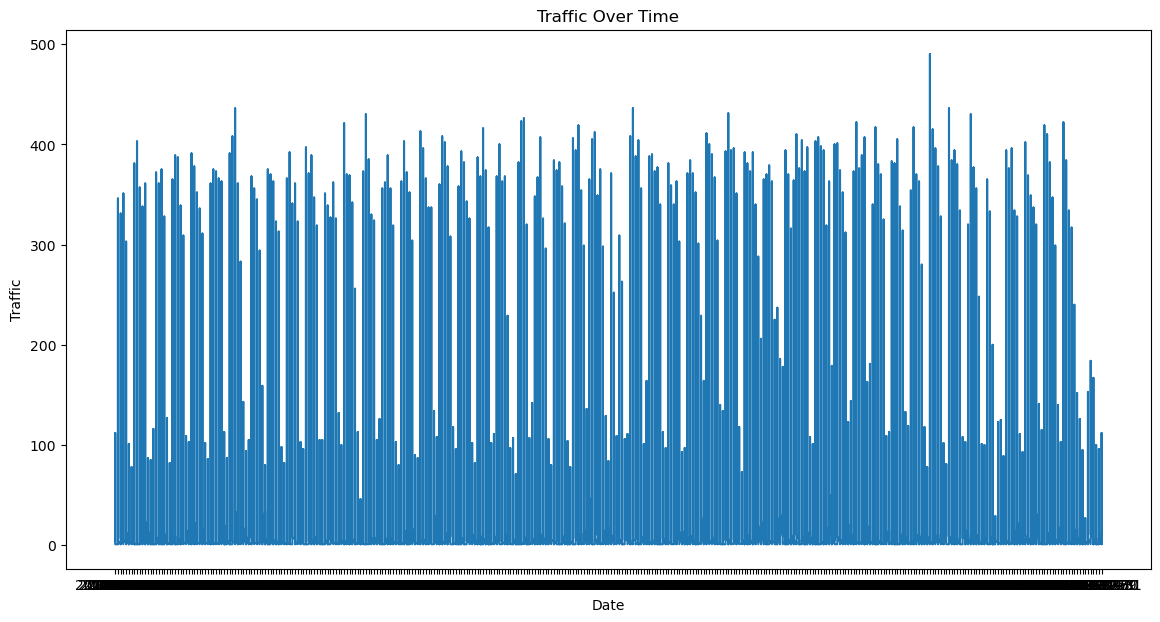

In [24]:
#df1.set_index('date', inplace=True)
plt.figure(figsize=(14,7))
plt.plot(df1['n'])
plt.title('Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.show()

We plot the graph to find out how the traffic looks for the data range(from January 2018 to January 2019). 
There is almost no traffic on Sept 10th? Why? There is very low traffic because maybe there is maintance for the station causing no traffic to visit the West Oakland Station.

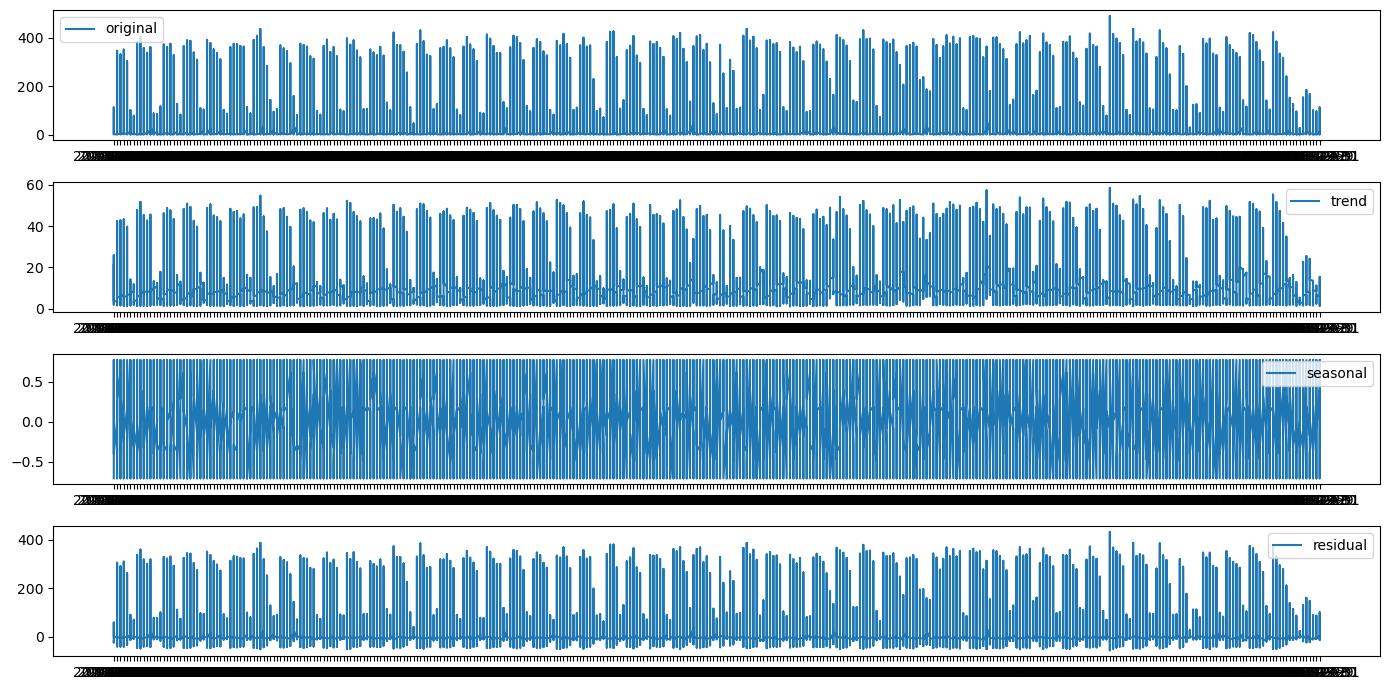

In [25]:
decomposition=seasonal_decompose(df['n'], model='additive', period=24)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(df['n'], label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

plt.tight_layout()

The first plot is the actual time series data and altered raw data that we are working with. 

The second plot shows the trend which is a long term movement in the time series. It indicates the general direction of the data over time. 

The third plot has a seasonal component which reviews seasonal patterns in the data. Seasonality refers to fluctuations that occur at specific regular intervals less than a year, such as monthly or quarterly. 

The fourth and last plot shows the residuals of the time series after the trend and seasonal component has been removed. What is left is random variation and cannot be explained by a seasonal or trend component.

### TA Feedback:
### Good work! In the above code, you set 'date' as the index for df1. However, it is important to set 'date' as index for df so that you will get the appropriate time series plots above. done

In [31]:
dailypassengercount=df1.groupby('date')['n'].sum().reset_index()

In [32]:
dailypassengercount.set_index('date', inplace=True)

In [33]:
traindata,testdata=train_test_split(dailypassengercount, test_size=0.2, shuffle=False)


In [35]:
df=oridf
#if 'Unnamed:0'
#df.drop('Unnamed: 0', axis=1, inplace=True)
df['date']=pd.to_datetime(df['date'])
df['date_time']=pd.to_datetime(df['date'].astype(str)+' '+df['hour'].astype(str).str.zfill(2)+':00')

### TA Feedback:
### It would be better to create a new 'date_time' column by combining 'date' and 'hour'.

In [39]:
#df.set_index('date_time', inplace=True)
#df.drop(['date', 'hour'], axis=1, inplace=True)
#df=df[~df.index.duplicated(keep='first')]
#df=df.asfreq('H')
#traindata.index.freq='H'
#model=ExponentialSmoothing(df['n'], seasonal='add', seasonal_periods=24).fit() 

In [42]:
df.columns
print(df.columns)

Index(['soo', 'dest', 'n'], dtype='object')


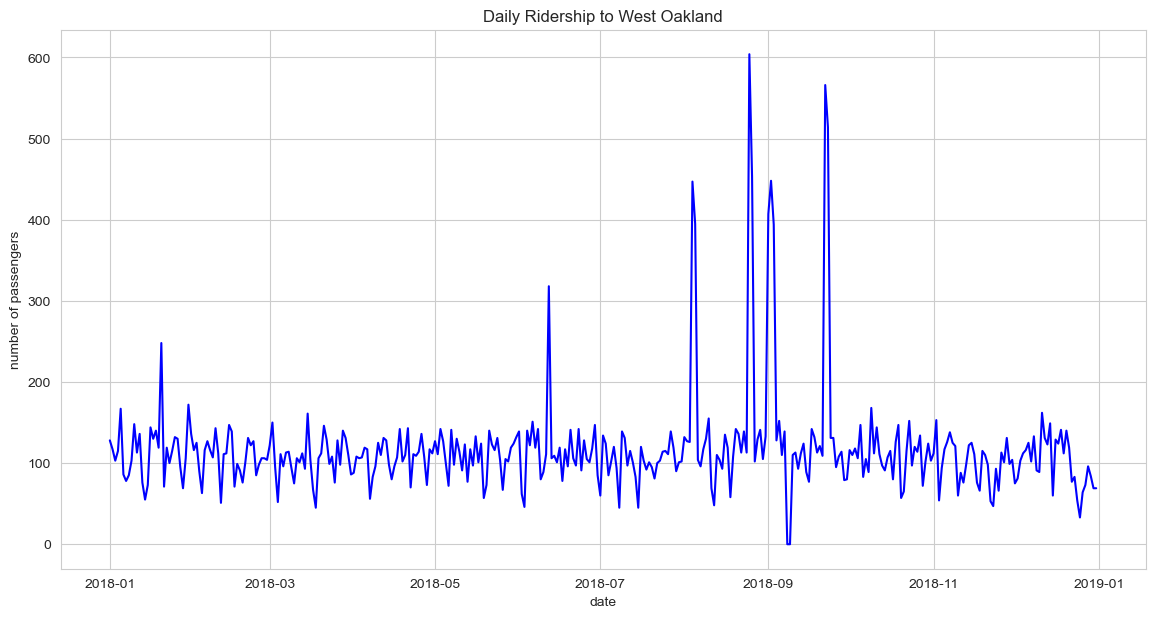

In [45]:
#forecast=model.forecast(len(testdata))
sns.set_style('whitegrid')
dailyrideship=df.groupby(df.index.date)['n'].sum()
plt.figure(figsize=(14,7))
dailyrideship.plot(title='Daily Ridership to West Oakland', color='blue')
plt.xlabel('date')
plt.ylabel('number of passengers')
plt.show()

In [44]:
df.head()

,soo,dest,n
date_time,,,
2018-01-01 00:00:00,12TH,WOAK,4.0
2018-01-01 01:00:00,12TH,WOAK,4.0
2018-01-01 02:00:00,16TH,WOAK,50.0
2018-01-01 03:00:00,16TH,WOAK,8.0
2018-01-01 04:00:00,12TH,WOAK,1.0


This displays the daily number of passengers that go to the West Oakland Station during the year long interval. There is a peak around september 2018 (August 15th?). It may indicate some major event happened for that period.

In [ ]:
hourlyridership=df.groupby('hour') 

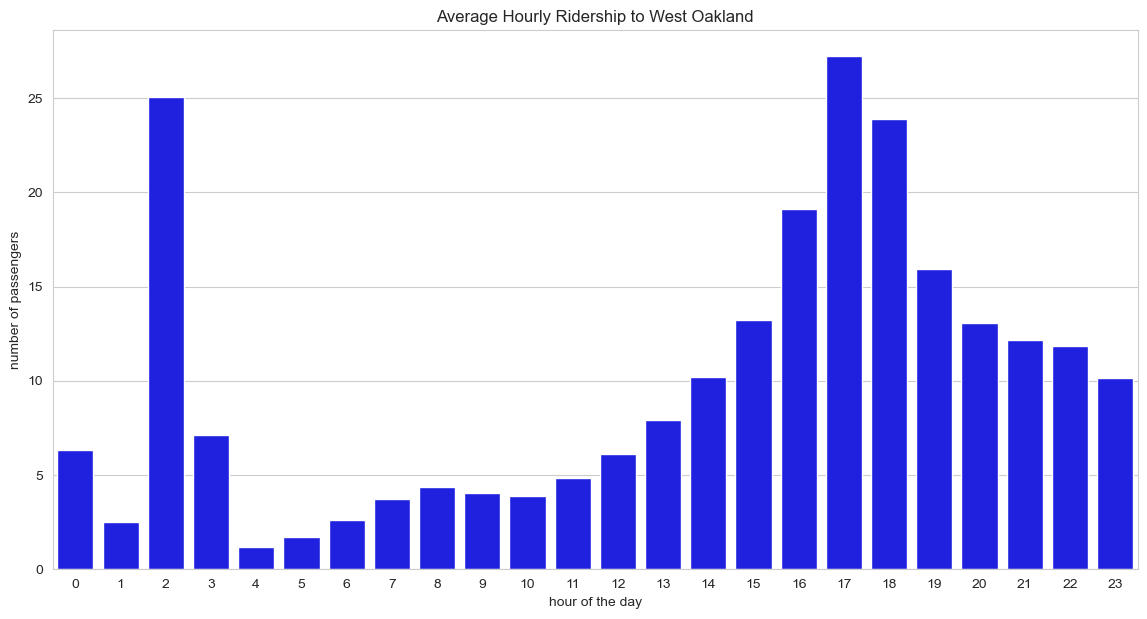

In [22]:
sns.set_style('whitegrid')
hourridership=df.groupby('hour')['n'].mean()
plt.figure(figsize=(14,7))
sns.barplot(x=hourridership.index, y=hourridership.values, color='blue')
plt.title('Average Hourly Ridership to West Oakland')
plt.xlabel('hour of the day')
plt.ylabel('number of passengers')
plt.show()

This plot indicates the average number of passengers for each hour. From this plot we can find out there is a peak time during 2am and 5pm. That may indicate many people work the night shift as well beside the normal afternoon rush.

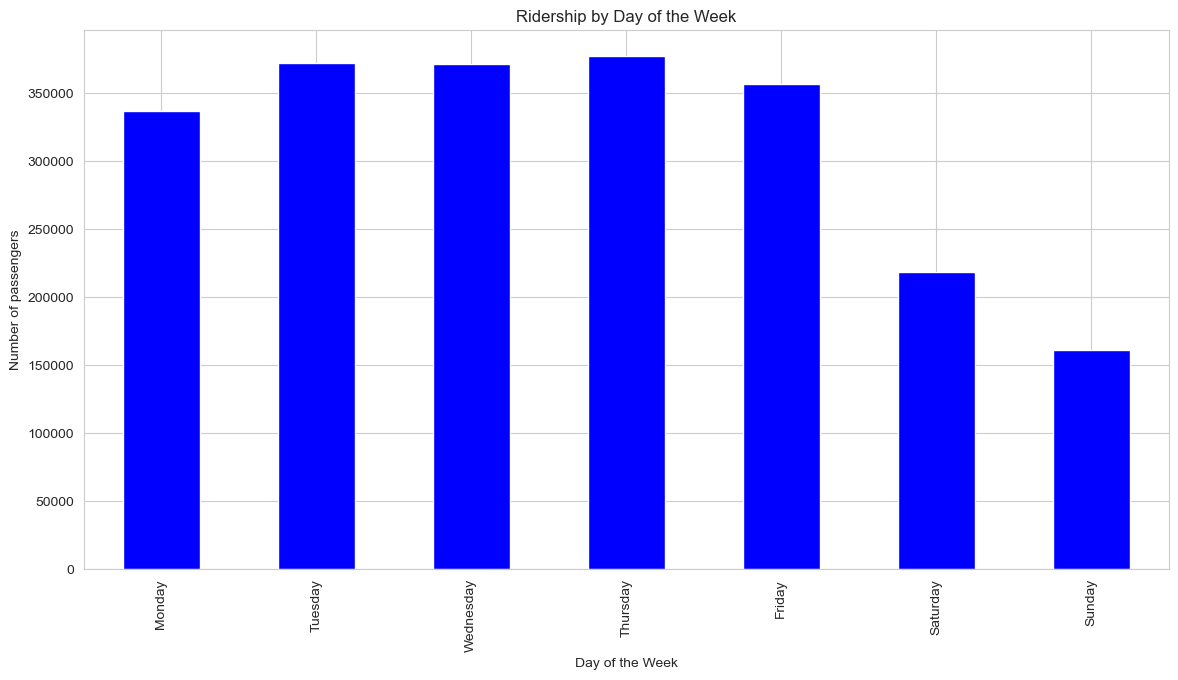

In [45]:
df['dayofweek']=df['date'].dt.day_name()
weeklyridership=df.groupby('dayofweek')['n'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(14,7))
weeklyridership.plot(kind='bar', color='blue')

plt.title('Ridership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of passengers')
plt.show()

This plot indicates the number of passengers for each week day. During the weekend the traffic is slower compared to weekdays.

In [42]:
stationtraffic=df.groupby('soo')['n'].sum().sort_values(ascending=False)
topstations=stationtraffic.head(10)
print(topstations)

soo
EMBR    505732
MONT    431133
POWL    353541
CIVC    266515
16TH    122649
24TH     75747
SFIA     40559
COLS     30042
12TH     29777
FTVL     29437
Name: n, dtype: int64


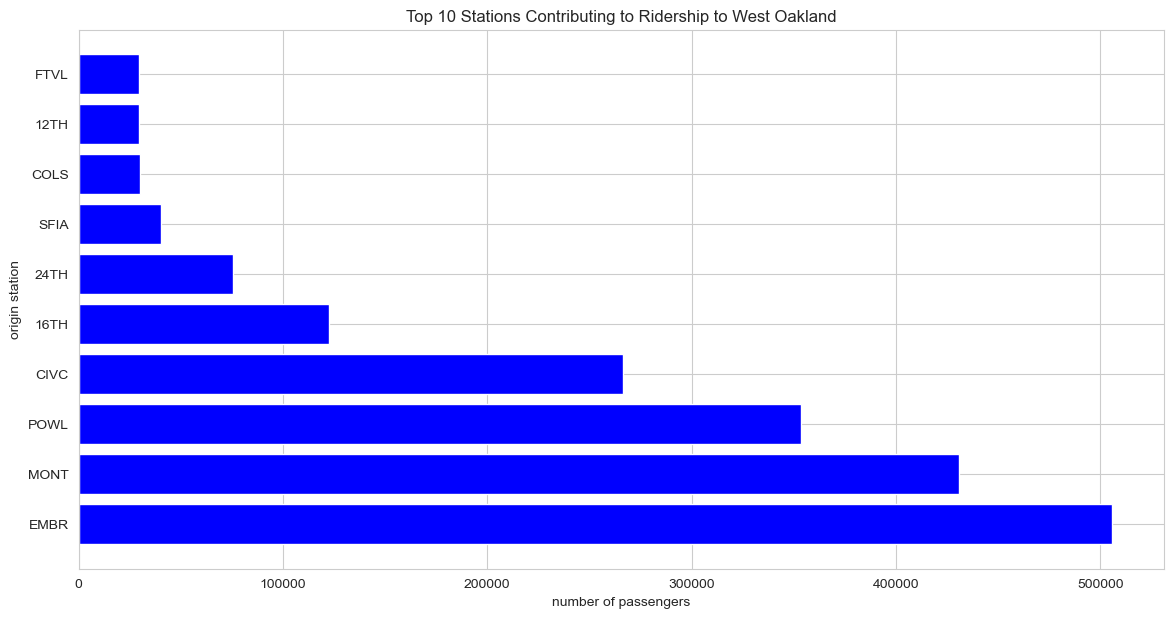

In [43]:
plt.figure(figsize=(14,7))
#sns.barplot(x=topstations.values, y=topstations.index.astype(str), palette='viridis')
plt.barh(y=range(len(topstations)), width=topstations.values, color='blue')
plt.yticks(range(len(topstations)), topstations.index)
plt.title('Top 10 Stations Contributing to Ridership to West Oakland')
plt.xlabel('number of passengers')
plt.ylabel('origin station')
plt.show()

This plot indicates the top 10 stations which have the highest traffic travel to West Oakland station.

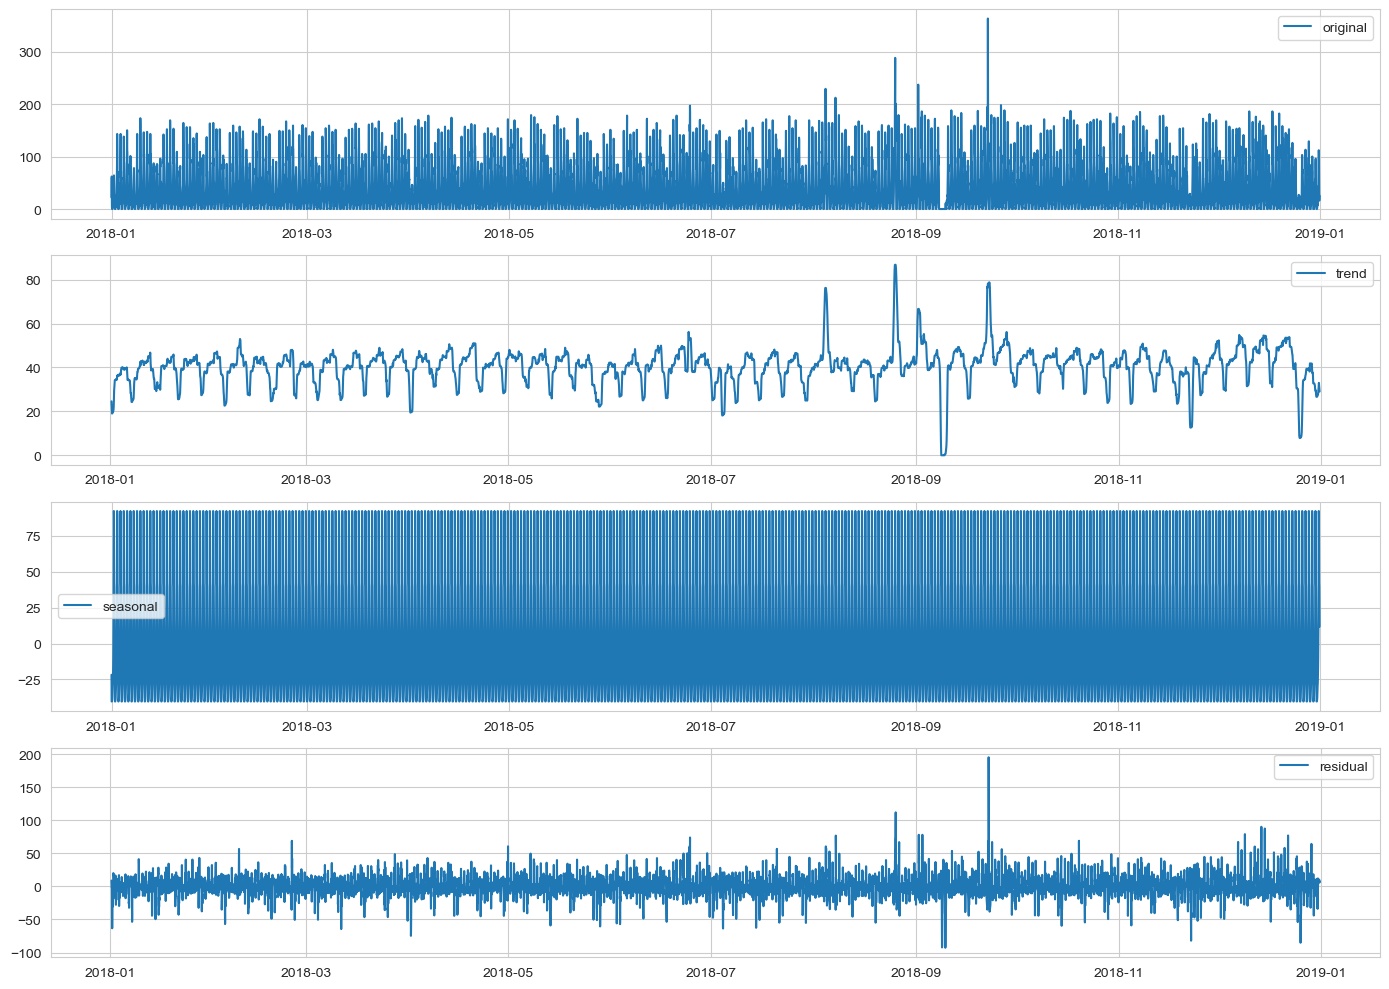

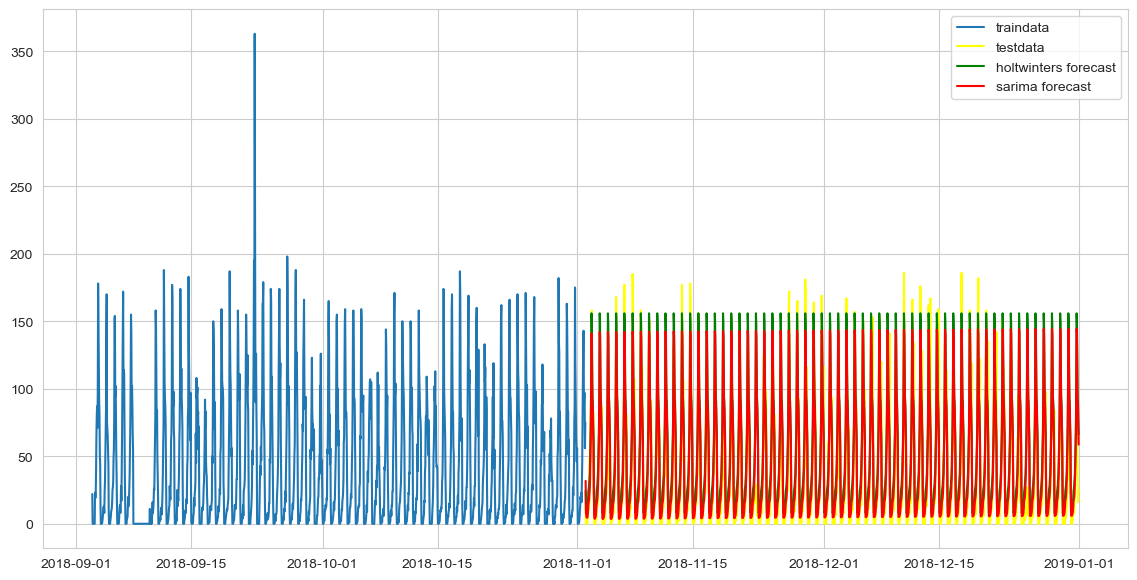

holtwinter mse: 575.6680069873984
sarima mse: 412.0781105838061


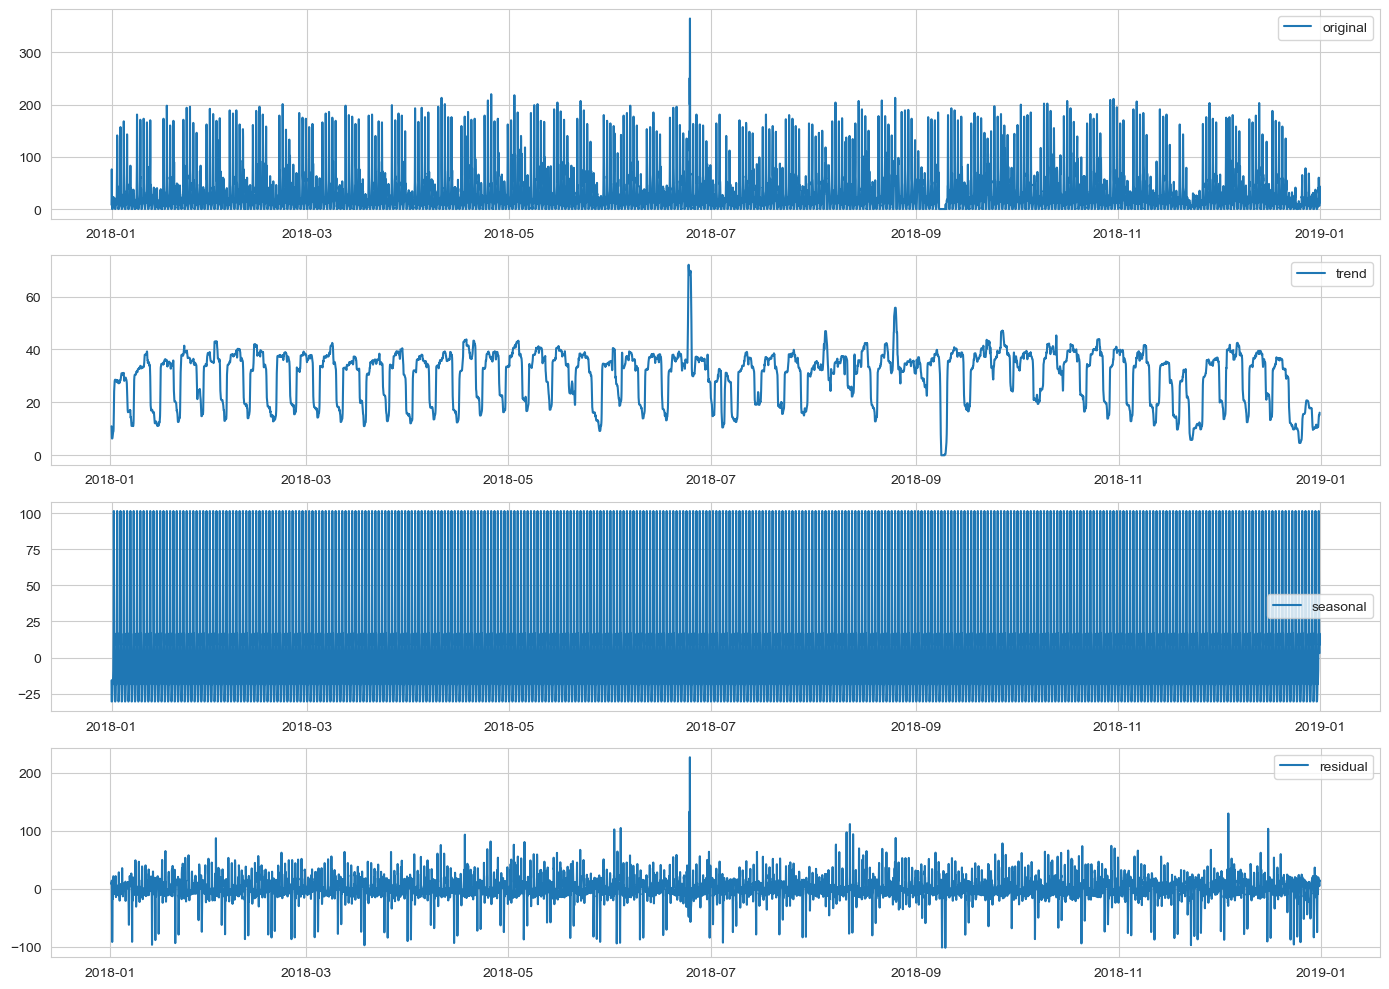

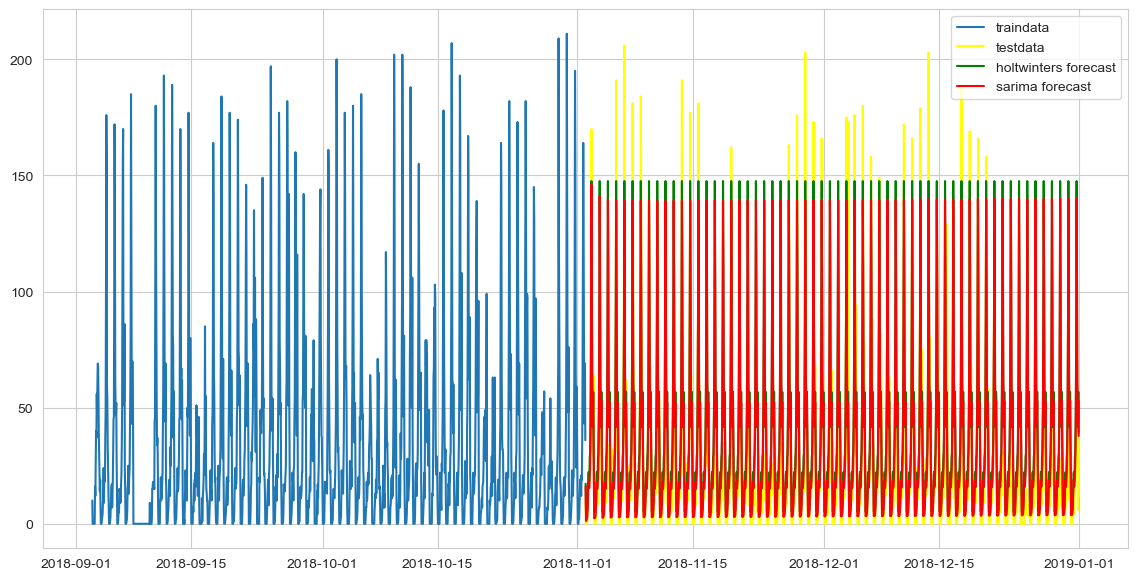

holtwinter mse: 699.7455736340945
sarima mse: 615.7883488958937


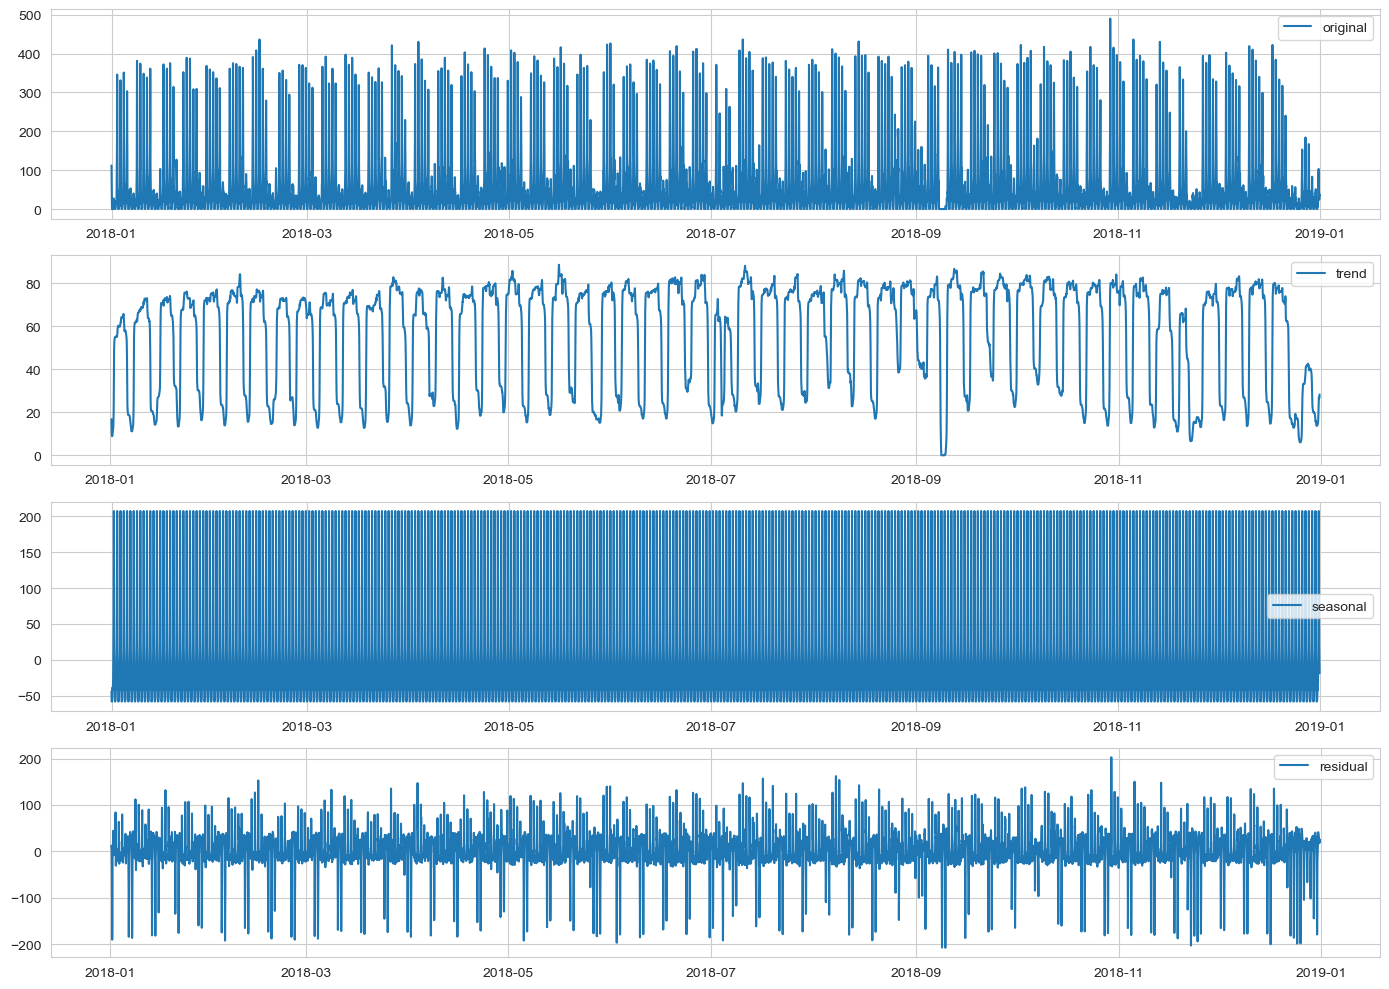

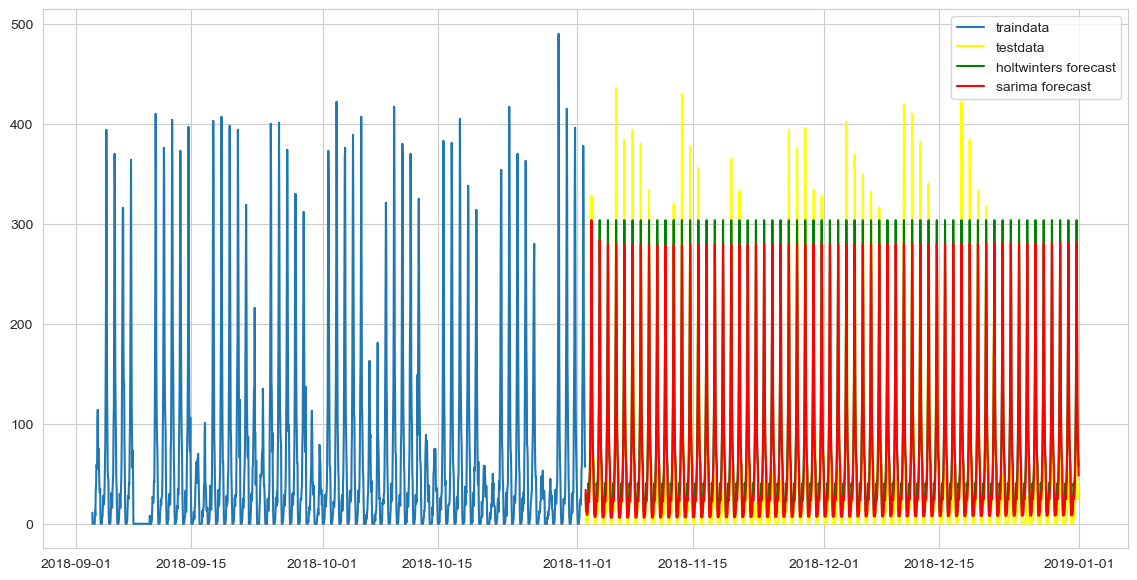

holtwinter mse: 3511.2888436212334
sarima mse: 2999.9147266004893


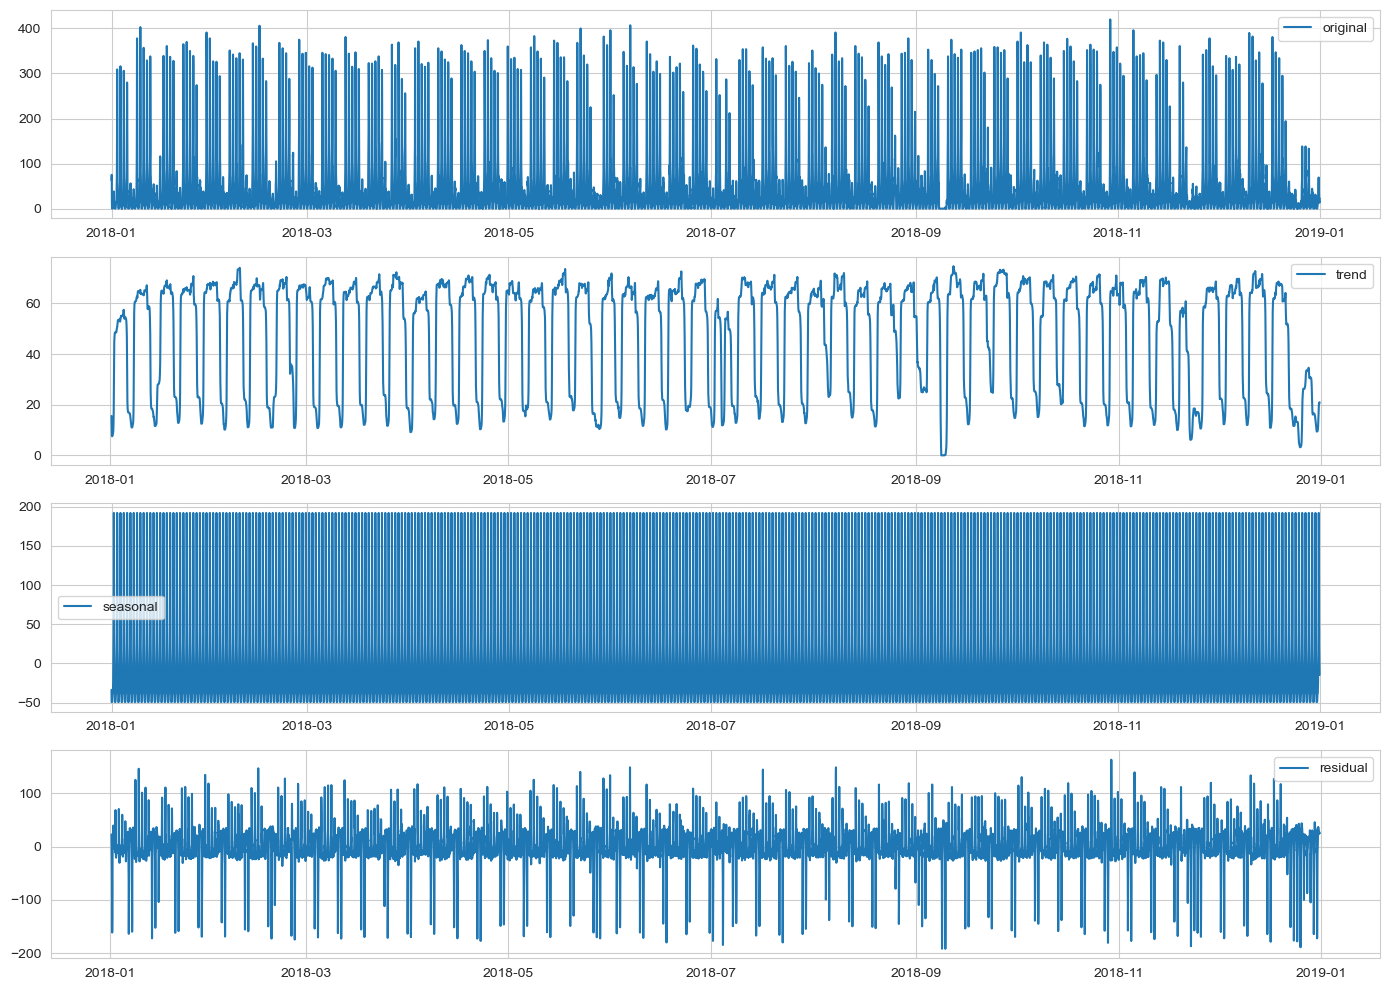

C:\Users\nicol\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


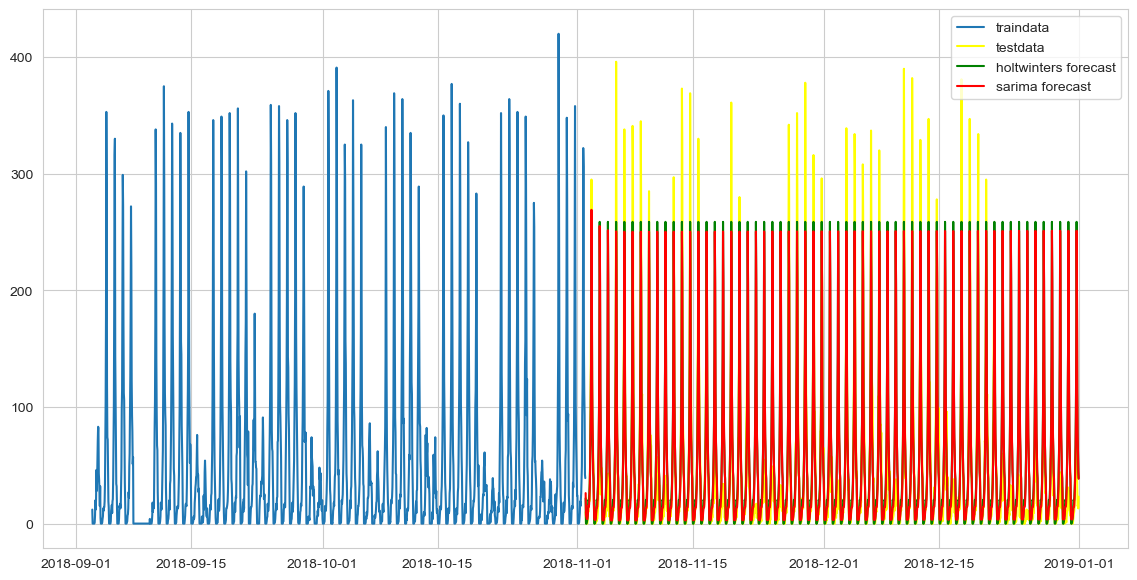

holtwinter mse: 2269.501804574054
sarima mse: 2222.51117083294


In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
df=oridf
#df['date']=pd.to_datetime(df['date'])
#df['date']=pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)
stations=['POWL', 'CIVC', 'EMBR', 'MONT']
df1=df[df['soo'].isin(stations)]
for station in stations:
    stationdf=df1[df1['soo']==station]
    hourlydata=stationdf['n'].resample('H').sum()
    decomposition=seasonal_decompose(hourlydata.dropna(), model='additive', period=24)
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    plt.figure(figsize=(14,10))
    plt.subplot(411)
    plt.plot(hourlydata, label='original')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.plot(trend, label='trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(seasonal, label='seasonal')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(residual, label='residual')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    sarimaorder=(2,1,2)
    seasonalorder=(1,1,1,24)
    
    traindata=hourlydata[:-60*24]
    testdata=hourlydata[-60*24:]
    hwmodel=ExponentialSmoothing(traindata, seasonal='add', seasonal_periods=24).fit()
    hwforecast=hwmodel.forecast(len(testdata))
    #arimamodel=ARIMA(traindata, order=(2,1,2)).fit()
    #arimaforecast=arimamodel.forecast(len(testdata))
    sarimamodel=SARIMAX(traindata, order=sarimaorder, seasonal_order=seasonalorder).fit()
    sarimaforecast=sarimamodel.forecast(steps=len(testdata))
    plt.figure(figsize=(14,7))
    plt.plot(traindata.index[-60*24:], traindata[-60*24:], label='traindata')
    plt.plot(testdata.index, testdata, label='testdata', color="yellow")
    plt.plot(hwforecast.index, hwforecast, label='holtwinters forecast', color='green')
    plt.plot(sarimaforecast.index, sarimaforecast, label='sarima forecast', color='red')
    plt.legend(loc='best')
    plt.show()
    
    hwmse=mean_squared_error(testdata, hwforecast)
    #predictedvalue=sarimaforecast.predicted_mean
    sarimamse=mean_squared_error(testdata,sarimaforecast)
    #arimamse=mean_squared_error(testdata, arimaforecast)
    print(f'holtwinter mse: {hwmse}')
    print(f'sarima mse: {sarimamse}')

### TA Feedback:
### Please note that your actual values and forecast values are away from each other.
### You can improve your model by selecting appropriate hyperparameters, such as seasonal periods, to achieve more accurate future forecasts. Additionally, when dealing with seasonal time series data, the standard ARIMA model may not be sufficient. In such cases, an extension of the ARIMA model known as the SARIMA model is commonly used.

Explanation: 

I did analysis on 4 stations: POWL, CIVC, EMBR, MONT:

The first plot is the actual time series data and altered raw data that we are working with. 

The second plot shows the trend which is a long term movement in the time series. It indicates the general direction of the data over time. 

The third plot has a seasonal component which reviews seasonal patterns in the data. Seasonality refers to fluctuations that occur at specific regular intervals less than a year, such as monthly or quarterly. 

The fourth and last plot shows the residuals of the time series after the trend and seasonal component has been removed. What is left is random variation and cannot be explained by a seasonal or trend component.

The fifth plot shows the split of data for test for training and testing purpose. It also uses two different forecast methods to predict the future traffic. From the graph it is hard to tell which forecast model is better, therefore, we calculate MSE to verify.

I calculated and printed out the Mean Squared Error(MSE) values for both the Holt Winter's model and the SARIMAX model. Holt Winters' forecast was defeated by the SARIMAX forecast in all 4 stations. A larger Holt Winters' MSE means that the model is more inaccurate compared to the SARIMAX MSE. Lower error (MSE) is good.

### TA Feedback:
### Redo the analysis with the above provided feedback. Along with a Jupyter notebook submit a report of findings in a word file for the part 3.
### Points: 20/20 